# Intro to Python - Project


## Objective:
The objective of the project is to check one's learning on Pandas and Python Visualization.

## Data Used:
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data. 

We have downloaded the zipped file where the data is present from 'https://grouplens.org/datasets/movielens/100k/'.
We have one folder inside the zipped file named ml-100k. We will be using three files from this folder:
1. u.data
2. u.item
3. u.user

## Data Transformation:
Since these files are not in .csv format. I have used microsoft excel to convert them to csv.
1. Open microsoft excel. Click on blank workbook.
2. On the menu bar click on "Data" tab.
3. You will see "Get Data From" option on the left hand corner. Click on it.
4. Select "From File".
5. Select "txt/csv".
6. Select the file you want to convert to csv (u.data, u.item, u.user). You can select one file at a time.
7. A new dialog box will open. Click on load.
8. You will see the data has been loaded to excel. But misses column names.
9. To fill in column names read the readme.txt from ml-100k folder in the zipped file or from 'http://files.grouplens.org/datasets/movielens/ml-100k-README.txt'. Fill in the column names using this file.
10. Click on file tab on the menu bar.
11. Click on save as.
12. Select the location where you want to save the file. Enter the file name and select the type as csv-utf8(comma delimiter), the default way of saving files in excel is excel workbook.

## Tasks To Perform:
1. Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames.
2. Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.
3. Display the top 25 movies by average rating, as a list/series/dataframe. Note:- Consider only the movies which received atleast a 100 ratings.
4. Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
     - Men watch more drama than women
     - Men watch more Romance than women
     - Women watch more Sci-Fi than men

## Python Packages Used:
1. Pandas for reading csv and creating data frame and anyform of data manipulations.
2. Seaborn and Matplotlib for data visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

## Loading data file to data dataframe

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,use_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Loading item file to item dataframe

In [5]:
item = pd.read_csv('item.csv')

In [6]:
item.head()

,movie_id,movie_name,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),1/1/1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1/1/1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1/1/1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1/1/1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1/1/1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Loading user file to user dataframe

In [7]:
user = pd.read_csv('user.csv')

In [8]:
user.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


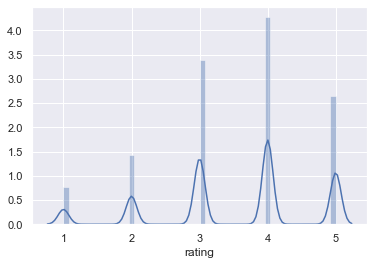

In [9]:
sns.distplot(data['rating']);

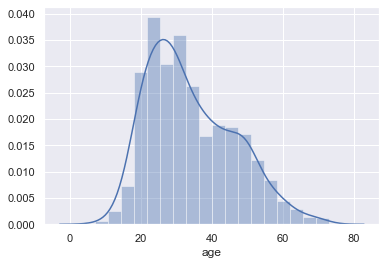

In [10]:
sns.distplot(user['age']);

In [11]:
item[item['release_date'].isnull()]

,movie_id,movie_name,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
item=item.dropna(subset = ['release_date'])

In [13]:
item[item['release_date'].isnull()]

,movie_id,movie_name,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western


In [14]:
item['release_date']=pd.to_datetime(item['release_date'])
item['release_year']=pd.DatetimeIndex(item['release_date']).year
item['release_year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1677    1998
1678    1998
1679    1998
1680    1994
1681    1996
Name: release_year, Length: 1681, dtype: int64

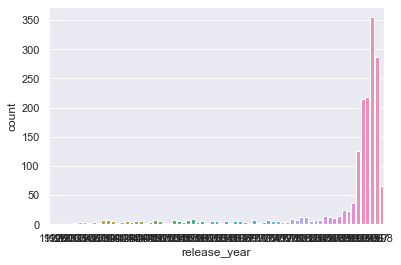

In [15]:
sns.countplot(item['release_year']);

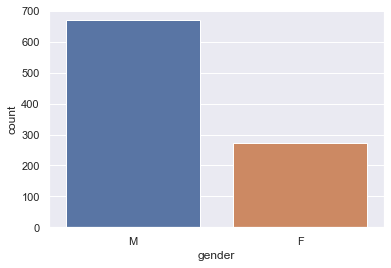

In [16]:
sns.countplot(user['gender']);

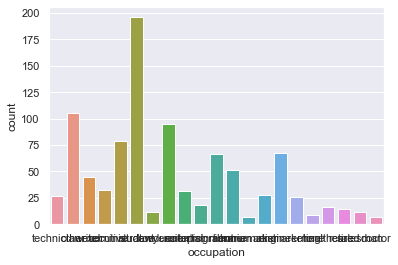

In [17]:
sns.countplot(user['occupation']);

In [19]:
item

,movie_id,movie_name,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,release_year
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1678,1679,B. Monkey (1998),1998-02-06,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1679,1680,Sliding Doors (1998),1998-01-01,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1680,1681,You So Crazy (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994


In [24]:
item = item.drop(['video_release_date', 'imdb_url','unknown'], axis=1)

In [25]:
item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      1681 non-null   int64         
 1   movie_name    1681 non-null   object        
 2   release_date  1681 non-null   datetime64[ns]
 3   action        1681 non-null   int64         
 4   adventure     1681 non-null   int64         
 5   animation     1681 non-null   int64         
 6   children      1681 non-null   int64         
 7   comedy        1681 non-null   int64         
 8   crime         1681 non-null   int64         
 9   documentary   1681 non-null   int64         
 10  drama         1681 non-null   int64         
 11  fantasy       1681 non-null   int64         
 12  film_noir     1681 non-null   int64         
 13  horror        1681 non-null   int64         
 14  musical       1681 non-null   int64         
 15  mystery       1681 non-null   int64   

In [26]:
genre_per_year = item.groupby('release_year').sum()

In [27]:
genre_per_year

,movie_id,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
release_year,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [28]:
genre_per_year = genre_per_year.drop(['movie_id'], axis=1)

In [29]:
genre_per_year

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
release_year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


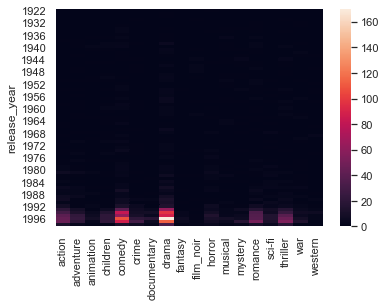

In [33]:
sns.heatmap(genre_per_year);